### Lab1. Experimental time complexity analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from time import perf_counter 
import random
import pandas as pd

#### 1. Generate an n-dimensional random vector with non-negative elements. For v, implement the following calculations and algorithms:

In [41]:
def const_fit(x, a):
    return [a]*len(x)

def linear_fit(x, a, b):
    return a*x + b

def quadratic_fit(x, a):
    return a*x**2

def nlogn_fit(x, a):
    return a*x*np.log(x)

def cubic_fit(x, a):
    return a * x**3

f(v) = const (constant function) - O(1)

In [30]:
def const_func(v):
    v=v
    return v

f(v) = $\sum_{k=1}^{n} v_k$ (the sum of elements) - O(n)

In [4]:
def sum_func(v):
    return np.sum(v)

f(v) = $\prod_{k=1}^{n} v_k$ (the product of elements) - O(n)

In [26]:
def prod_func(v):
    prod = 1.0
    for x in v:
        prod *= x
    return prod

Supposing that the elements of v are the coefficients of a polynominal P of degree n-1, calculate the value P(1,5) by a direct calculation of P(x) = $\sum_{k=1}^{n} v_k  x^{k-1}$ (i.e. evaluating each term one by one) and by Horner's method by representing the polynominal as P(x) = $v_1 +x(v_2 + x(v_3 + ..))$ 

polynominal - $O(n)$
Horner - $O(n)$

In [23]:
def poly_func(v, x=1.5):
    result = 0
    cur_power = 1
    for k in range(len(v)):
        result += v[k] * cur_power
        cur_power *= x
    return result

In [7]:
def poly_horner(v, x = 1.5):
    result = 0
    for i in range(len(v)-1, -1, -1):
        result = result*x + v[i]
    return result

Bubble Sort of the elements of v - $O(n^2)$

In [27]:
def bubbleSort(v):
    v_1 = v.copy()
    n = len(v_1)
    for i in range(n):
        swapped = False
        for j in range(n-i-1):
            if v_1[j] > v_1[j+1]:
                v_1[j], v_1[j+1] = v_1[j+1], v_1[j]
                swapped = True
        if not swapped:
            break
    return v_1

Quick Sort of the element of v - $O(n log_n)$

In [9]:
def quick_sort(v):
    if len(v) <= 1:
        return v
    pivot = v[len(v) // 2]
    left = [x for x in v if x < pivot]
    middle = [x for x in v if x == pivot]
    right = [x for x in v if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

Timesort of the element of v - $O(n log_n)$

In [14]:
def timSort(v):
    return sorted(v)

Generate random matrices A and B of size n*n with non-negative elements. Find the usual matrix product for A and B - $O(n^3)$

In [17]:
def matrix_mult(A, B):
    return np.dot(A, B)

In [21]:
def measure_time(algo, n, runs=5):
    times = []
    for _ in range(runs):
        if algo == matrix_mult:
            A = np.random.rand(n, n)
            B = np.random.rand(n, n)
            start = perf_counter()
            algo(A, B)
            end = perf_counter()
        else:
            v = np.random.rand(n)
            start = perf_counter()
            algo(v)
            end = perf_counter()
        times.append(end - start)
    return np.mean(times)

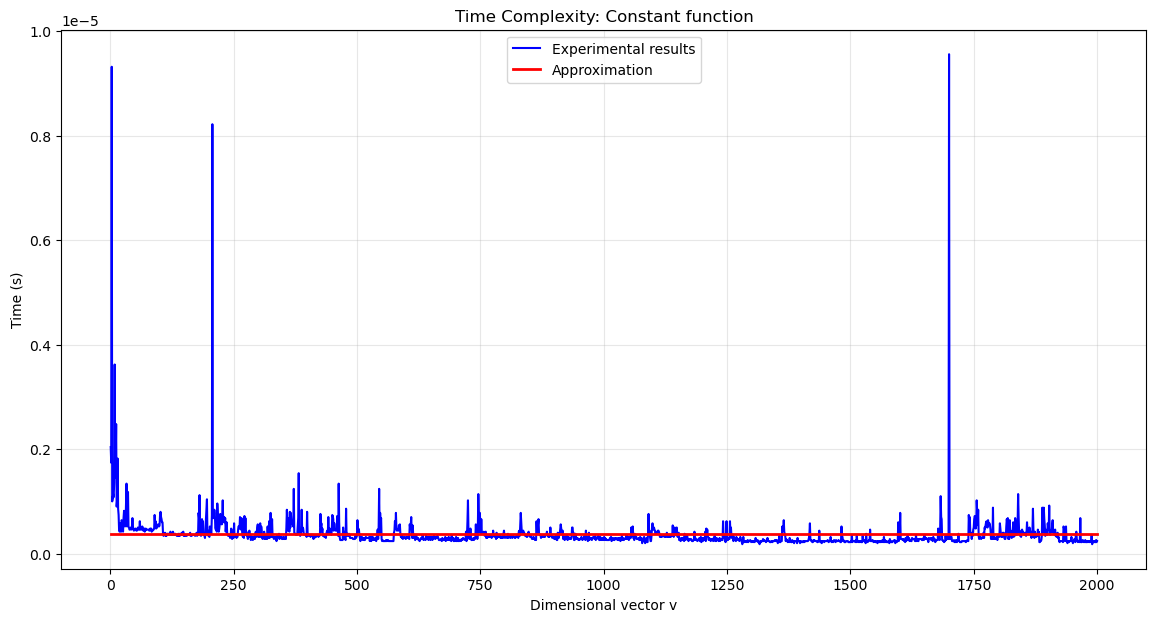

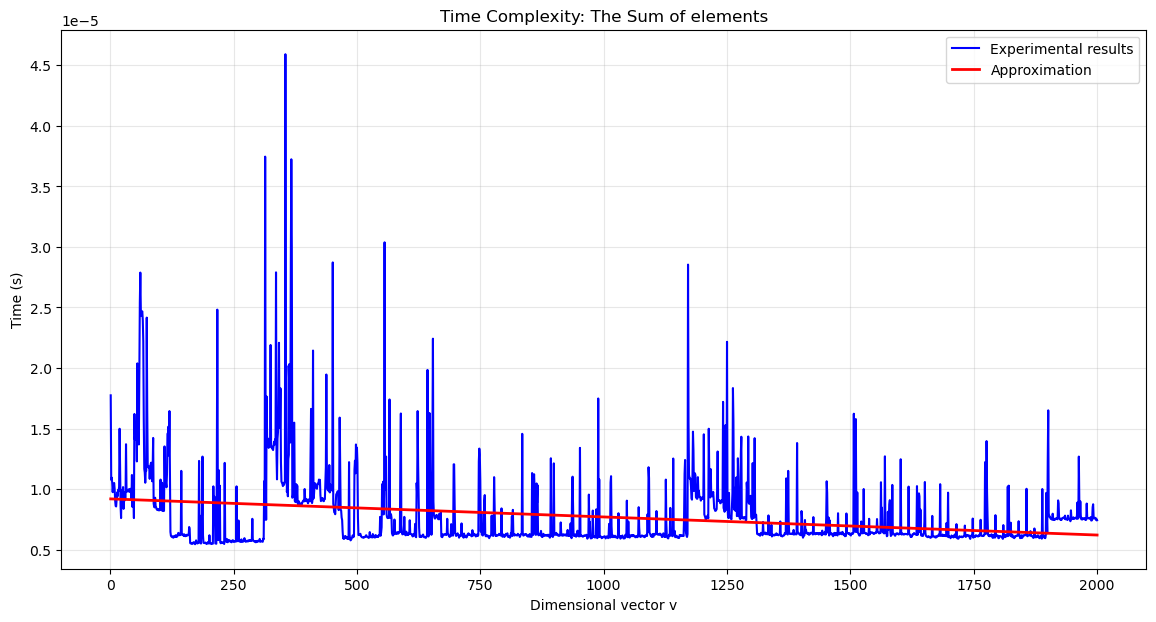

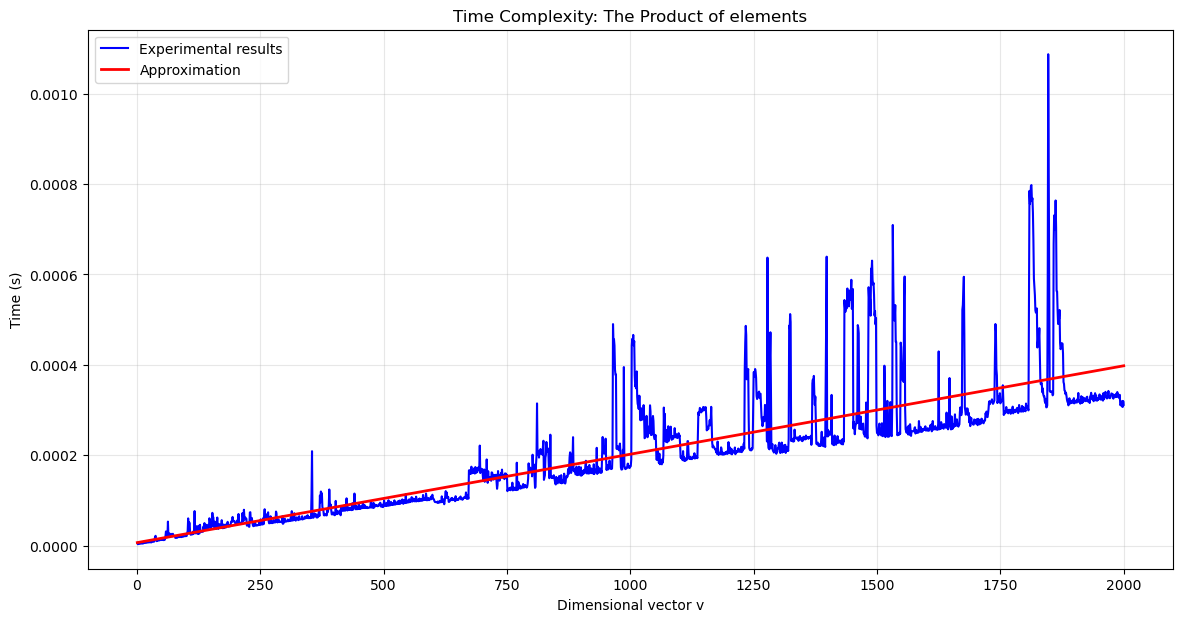

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_17820\1887604689.py:5: RuntimeWarning: overflow encountered in scalar add
  result += v[k] * cur_power


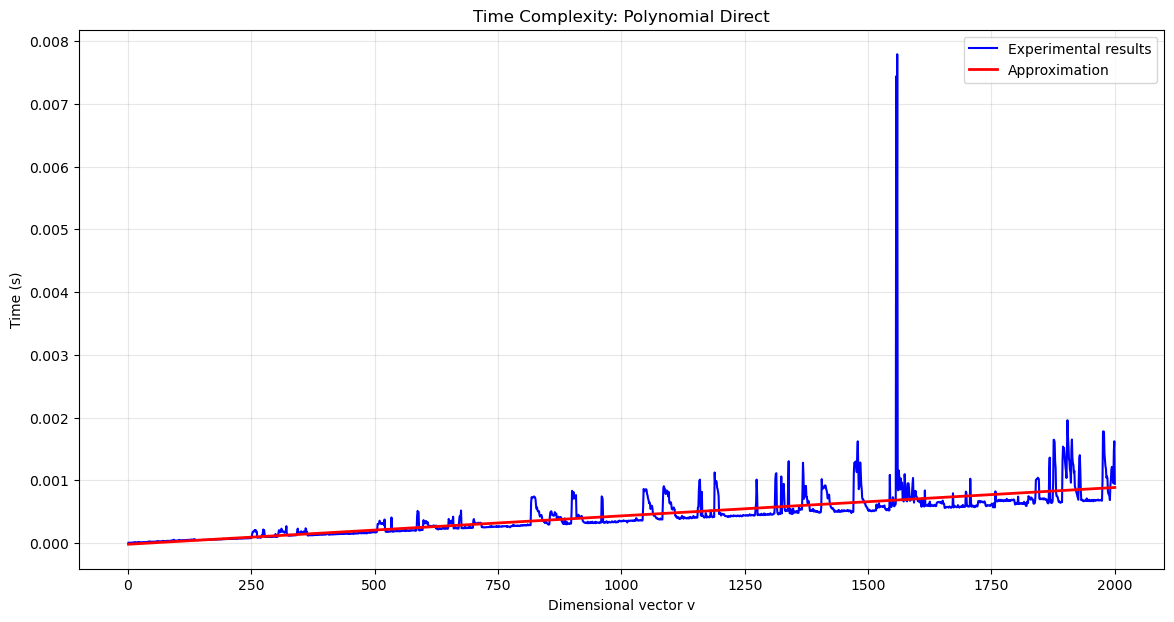

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_17820\1469844380.py:4: RuntimeWarning: overflow encountered in scalar multiply
  result = result*x + v[i]


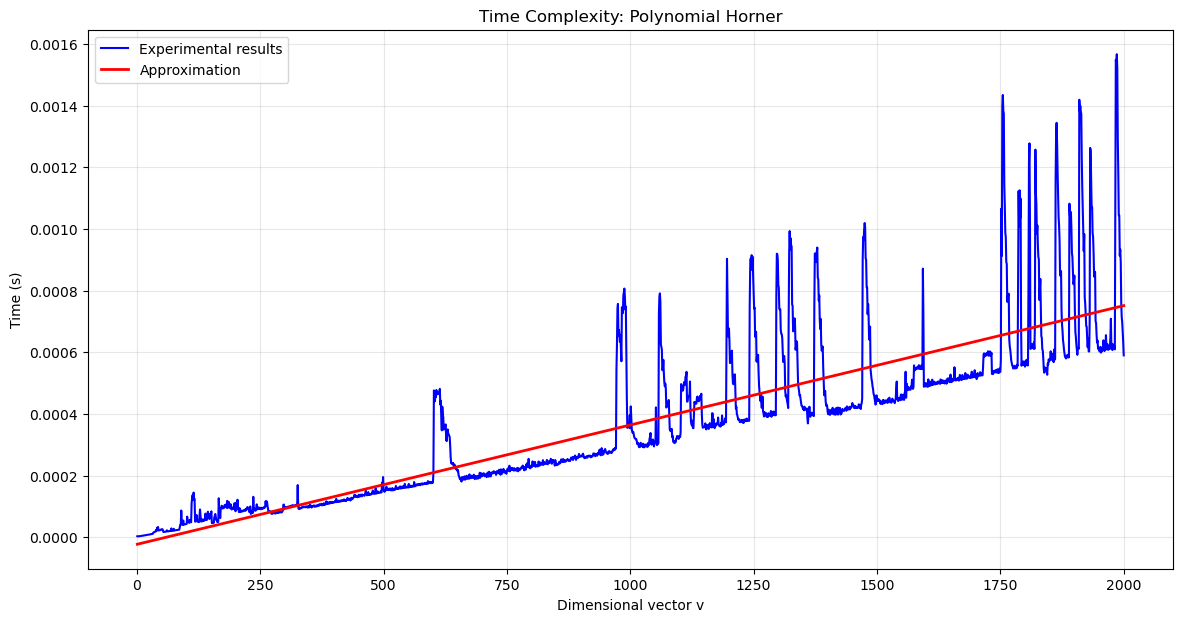

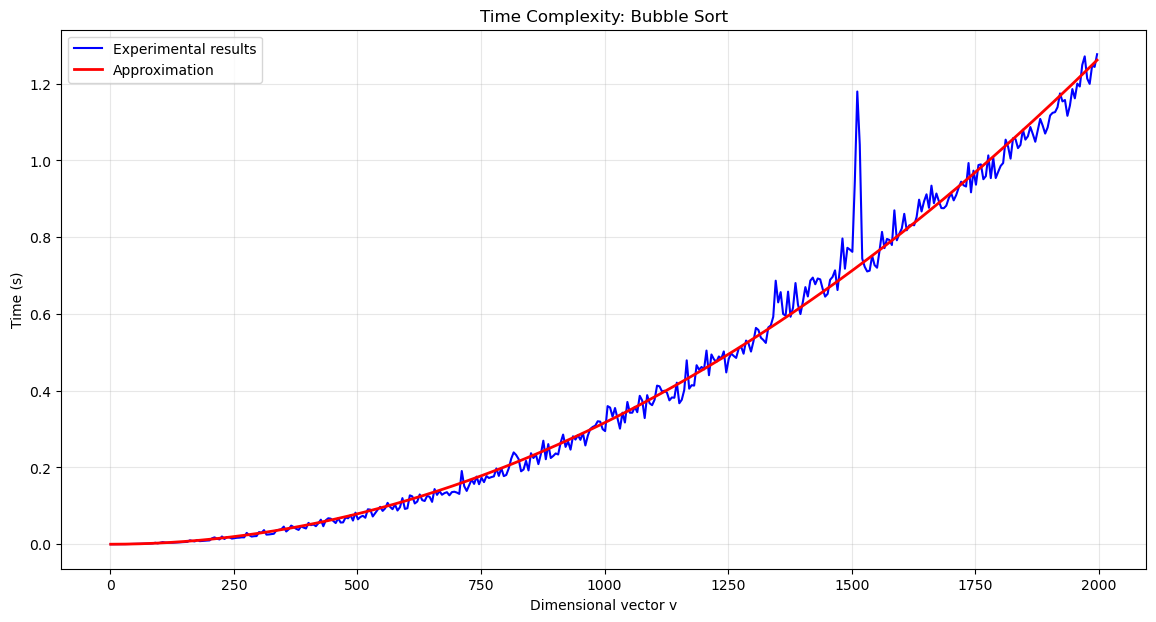

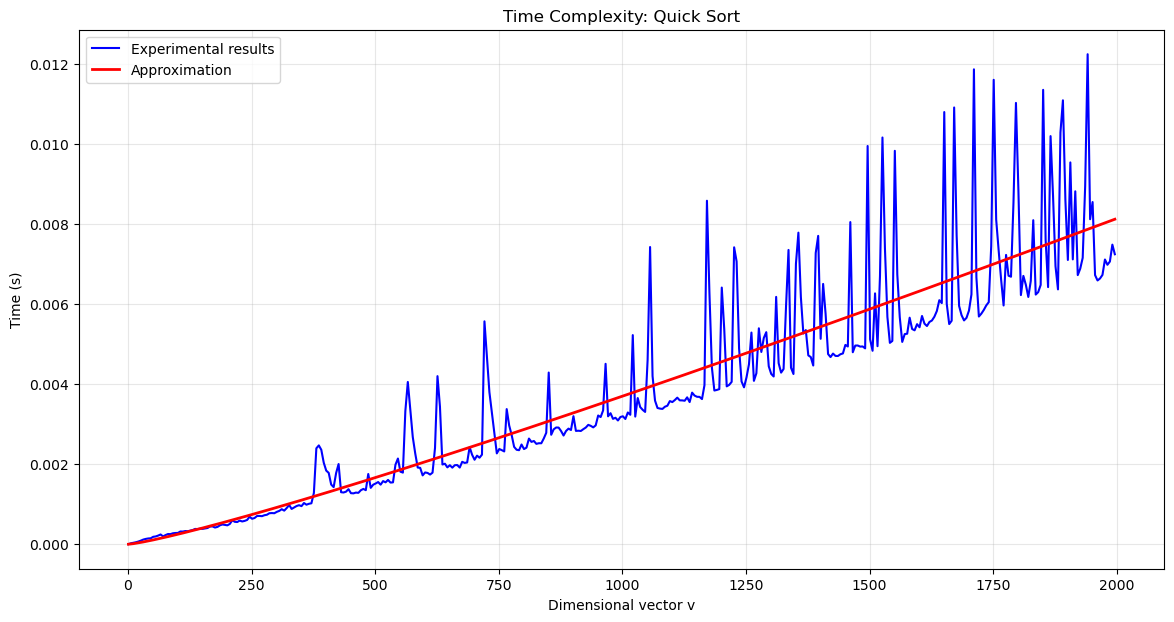

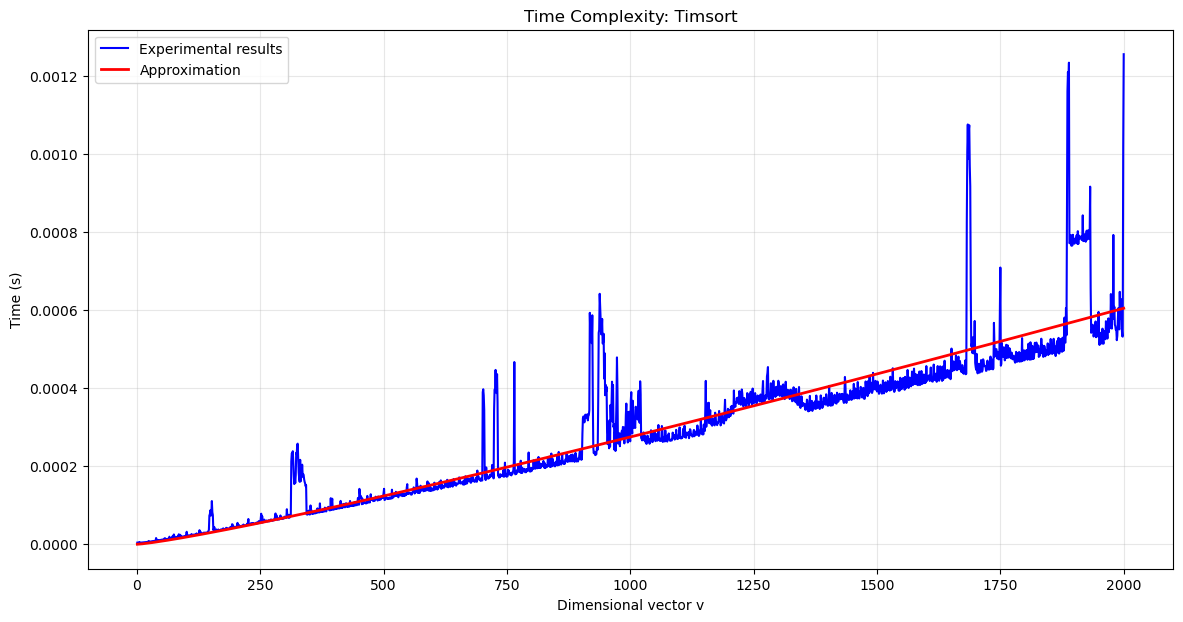

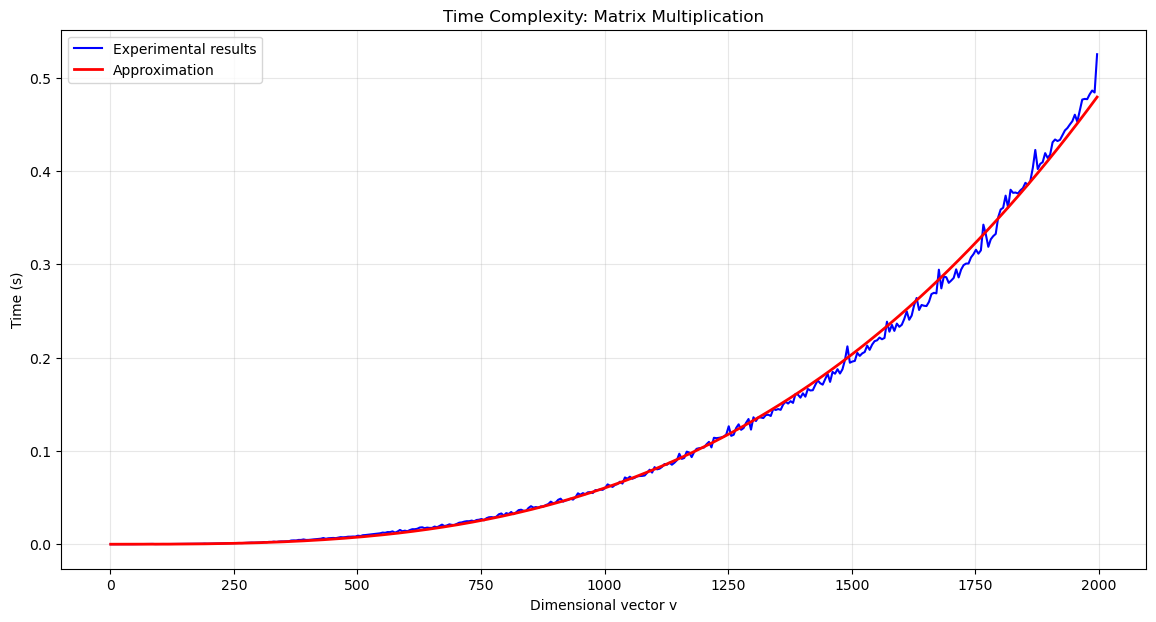

In [38]:
def run_experiment():
    n_fast = np.arange(1, 2001)
    n_slow = np.arange(1, 2001, 5)
    
    algorithms = [
        ("Constant function", const_func, const_fit, n_fast),
        ("The Sum of elements", sum_func, linear_fit, n_fast),
        ("The Product of elements", prod_func, linear_fit, n_fast),
        ("Polynomial Direct", poly_func, linear_fit, n_fast),
        ("Polynomial Horner", poly_horner, linear_fit, n_fast),
        ("Bubble Sort", bubbleSort, quadratic_fit, n_slow),
        ("Quick Sort", quick_sort, nlogn_fit, n_slow),
        ("Timsort", timSort, nlogn_fit, n_fast),
        ("Matrix Multiplication", matrix_mult, cubic_fit, n_slow)
    ]
    
    for name, algorithm, fit_func, n_range in algorithms:
        
        times = []
        for n in n_range:
            t = measure_time(algorithm, n)
            times.append(t)
        
        try:
            popt, _ = curve_fit(fit_func, n_range, times, maxfev=10000)
            
            # Graphic
            plt.figure(figsize=(14, 7))
            plt.plot(n_range, times, 'b-', label='Experimental results', markersize=4)
            
            n_smooth = np.linspace(min(n_range), max(n_range), 200)
            plt.plot(n_smooth, fit_func(n_smooth, *popt), 'r-', label='Approximation', linewidth=2)
            
            plt.legend()
            plt.xlabel('Dimensional vector v')
            plt.ylabel('Time (s)')
            plt.title(f'Time Complexity: {name}')
            plt.grid(True, alpha=0.3)
            plt.show()
            
        except Exception as e:
            print(f"Fitting failed for {name}: {e}")

if __name__ == "__main__":
    run_experiment()

#### Task 3. Describe the data structures and design techniques used within the algorithms.


    Data Structures Used:
    - 1D Arrays/Vectors: For all vector operations and sorting algorithms
    - 2D Arrays/Matrices
    - Temporary arrays: For sorting algorithms to preserve original data

    Design Techniques:
    - Iterative algorithms: The Sum of elements, The Product of elements, Polynomial evaluation
    - Divide and Conquer: Quick Sort
    - Hybrid approach: Timsort (Combination of Merge Sort and Insertion Sort)
    - Recursion: Quick Sort
